In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-sindhi'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

توهان ڪير ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا آهن?  dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي (nigga) [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي https://t.co/L17zFSuqGQ [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن تي آهيون، تنهنڪري ايندڙ ڀيري توهان هڪ خراب ڪچي، هڪ خوبصورت عورت، جيڪو توهان چاهيو ٿا. راند ڪريو FIHTEEN ته جيئن هوء توهان کي مختلف ڄاڻي سگهي [0 1 0 0 0]
بس هڪ وار ڪٽيو، ڪو به مون کي منهنجي ڪچي مان وٺي سگهي ٿو [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern جيڪڏهن توهان سڀ ڪجهه محسوس ڪيو ته پوءِ اهو ڪريو.  ٽرمپ وٽ بالز آهن جيڪي ڪرڻ لاءِ جمهوريت پسند چاهين ٿا ته اهي ڪري سگهن.  پر لبرل ۽ جمهوريت پسند نرم آهن ۽ منسوخ ٿيڻ کان خوفزده آهن يا اهي پري کاٻي پاسي نه جهڪندا آهن!! 😂😂Y' سڀ گونگا آهن جيئن ته اهو مزاحيه آهي [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي nigga [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن آهيون، تنهنڪري ايندڙ ڀيري خراب ڪچي، خوبصورت عورت، جيڪو چاهيو ٿا راند ڪريو fihteen ته هوء کي ڄاڻي سگهي [0 1 0 0 0]
بس وار ڪٽيو، ڪو مون کي منهنجي ڪچي وٺي سگهي ٿو [0 1 0 0 0]
barnlife5 realshawnshawn grantstern جيڪڏهن سڀ ڪجهه محسوس ڪيو ته پوءِ ڪريو ٽرمپ وٽ بالز جيڪي لاءِ جمهوريت پسند چاهين ٿا ته ڪري سگهن پر لبرل جمهوريت پسند نرم منسوخ کان خوفزده يا پري کاٻي نه جهڪندا 😂😂y سڀ گونگا ته مزاحيه آهي [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.57it/s, loss=0.106] 


Train loss 0.24787220488692716 accuracy 0.5435305591677503
Validation loss 0.1062453517023428 accuracy 0.853813146089331
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.853813146089331
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.60it/s, loss=0.0501]


Train loss 0.09996143512087739 accuracy 0.8620936280884265
Validation loss 0.09107396135359634 accuracy 0.8775112151355569
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8775112151355569
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.56it/s, loss=0.0447]


Train loss 0.08293194835425907 accuracy 0.8831924577373212
Validation loss 0.08400471950018848 accuracy 0.8925297444899551
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8925297444899551
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [01:33<00:00,  2.59it/s, loss=0.045] 


Train loss 0.07290719090130073 accuracy 0.8982769830949284
Validation loss 0.0843184019588394 accuracy 0.8983811195630973
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8983811195630973
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.55it/s, loss=0.042] 


Train loss 0.06575943837212823 accuracy 0.9127438231469441
Validation loss 0.08846254950320279 accuracy 0.9029646967037254
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.9029646967037254
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:38<00:00,  2.45it/s, loss=0.0206]


Train loss 0.06018245336116597 accuracy 0.9217815344603381
Validation loss 0.09376871250109908 accuracy 0.8989662570704116
No improvement in validation accuracy for 1 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.54it/s, loss=0.0284]


Train loss 0.055508693301455116 accuracy 0.9302015604681404
Validation loss 0.11185124001385253 accuracy 0.8955529549444119
No improvement in validation accuracy for 2 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.59it/s, loss=0.00947]


Train loss 0.04936126005909255 accuracy 0.9381339401820546
Validation loss 0.1109878193633056 accuracy 0.90013653208504
No improvement in validation accuracy for 3 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.62it/s, loss=0.00565]


Train loss 0.041366959147201655 accuracy 0.9504551365409623
Validation loss 0.1131129274489703 accuracy 0.9033547883752682
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.9033547883752682
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [01:35<00:00,  2.52it/s, loss=0.00384]


Train loss 0.034146033170443665 accuracy 0.9629388816644994
Validation loss 0.11516363794604938 accuracy 0.9049151550614395
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.9049151550614395
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.56it/s, loss=0.00368]


Train loss 0.030525193170980545 accuracy 0.9667100130039011
Validation loss 0.10563085476557414 accuracy 0.9122293739028672
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.9122293739028672
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [01:34<00:00,  2.56it/s, loss=0.00493]


Train loss 0.028713357053248838 accuracy 0.969408322496749
Validation loss 0.12239513348466084 accuracy 0.9133996489174956
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.9133996489174956
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [01:39<00:00,  2.43it/s, loss=0.0115] 


Train loss 0.0267776108918812 accuracy 0.9711638491547464
Validation loss 0.12629356285856094 accuracy 0.9173980885508094
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.9173980885508094
Epoch 13/50
----------


Training Progress: 100%|██████████| 241/241 [01:35<00:00,  2.53it/s, loss=0.00157]


Train loss 0.023327270802400265 accuracy 0.9765279583875163
Validation loss 0.12653774363391193 accuracy 0.9091086405305246
No improvement in validation accuracy for 1 epochs.
Epoch 14/50
----------


Training Progress: 100%|██████████| 241/241 [01:38<00:00,  2.46it/s, loss=0.0018] 


Train loss 0.019591051608872798 accuracy 0.9793237971391417
Validation loss 0.13341324339494293 accuracy 0.9087185488589818
No improvement in validation accuracy for 2 epochs.
Epoch 15/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.63it/s, loss=0.00517]


Train loss 0.01575604385814216 accuracy 0.9845578673602081
Validation loss 0.139264247805616 accuracy 0.9080358884337819
No improvement in validation accuracy for 3 epochs.
Epoch 16/50
----------


Training Progress: 100%|██████████| 241/241 [01:31<00:00,  2.62it/s, loss=0.00122]


Train loss 0.015049843527222075 accuracy 0.9842327698309493
Validation loss 0.1407962297031909 accuracy 0.9131070801638385
No improvement in validation accuracy for 4 epochs.
Epoch 17/50
----------


Training Progress: 100%|██████████| 241/241 [01:32<00:00,  2.61it/s, loss=0.000922]


Train loss 0.013594238679755587 accuracy 0.9863459037711313
Validation loss 0.14324339998908986 accuracy 0.9143748780963527
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


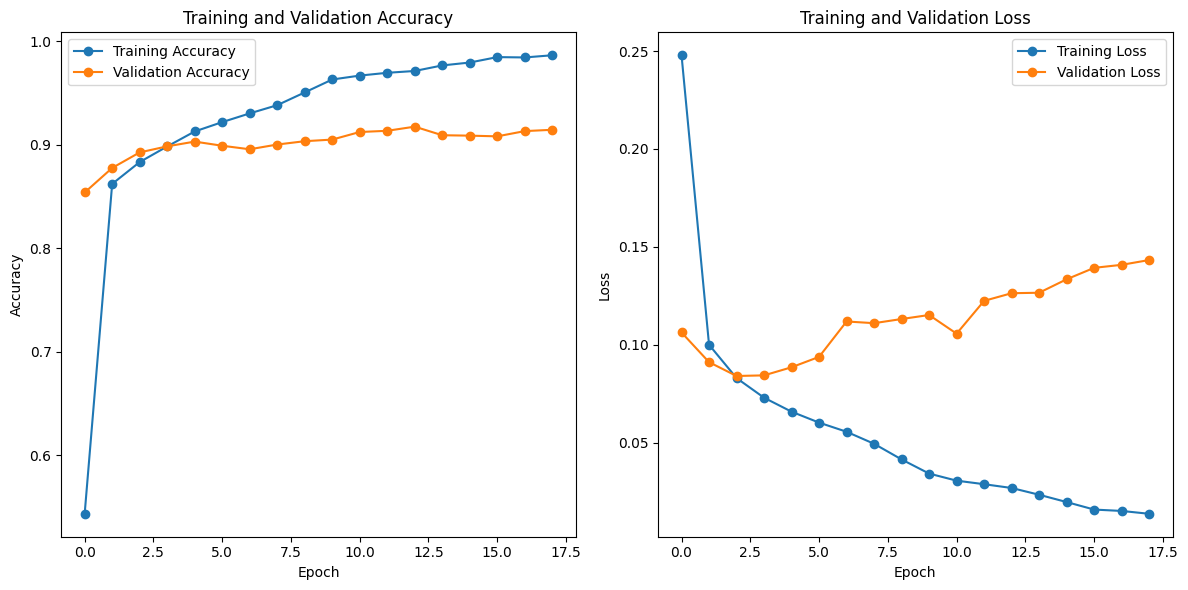

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.92 Test Loss: 0.1344596584957024


Accuracy: 0.92
F1 Score: 0.92
Precision: 0.92
Recall: 0.92

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.67      0.33      0.44       138
     Gender/Sexual       0.92      0.92      0.92      3448
Origin/Nationality       0.53      0.82      0.65        87
    Race/Ethnicity       0.91      0.94      0.93      3321
          Religion       0.95      0.92      0.93      3260

          accuracy                           0.92     10254
         macro avg       0.80      0.79      0.77     10254
      weighted avg       0.92      0.92      0.92     10254



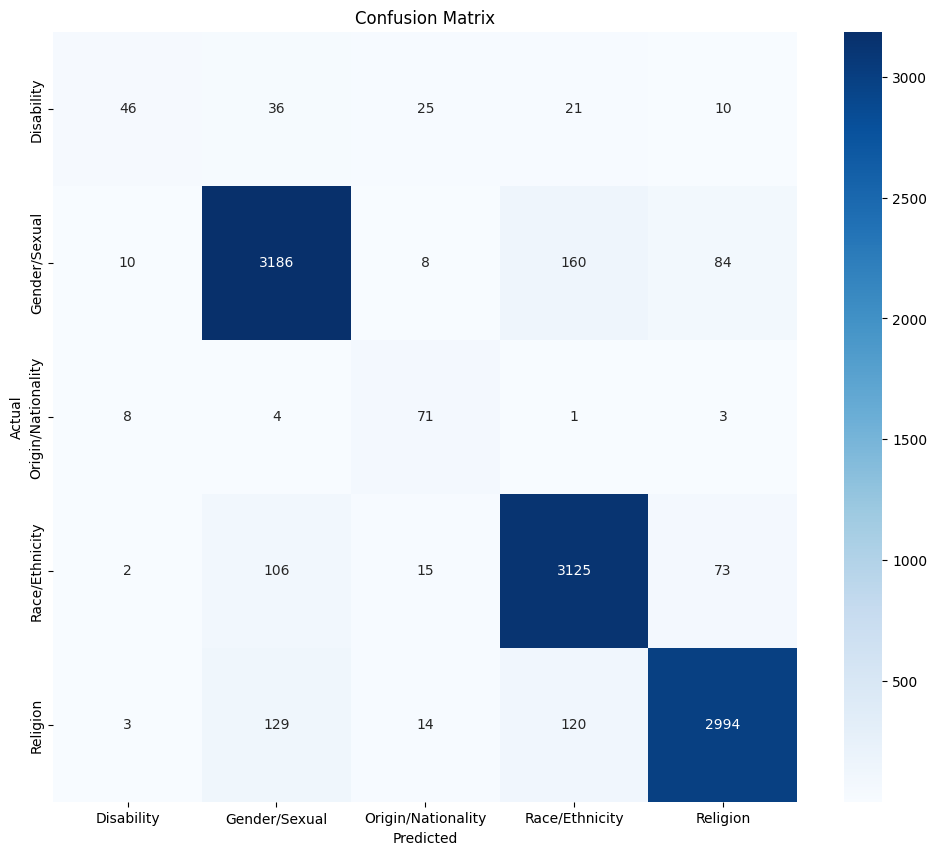

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 0.98
